Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/Car_Price_Prediction.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#Also we can check this way
car_dataset.isnull().sum().sum()

0

In [9]:
#To check for Duplicates
car_dataset.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [10]:
car_dataset.drop_duplicates()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [12]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [15]:
#Correlation
#Univariate Correlation -> Analysis on one type of variable
mean = car_dataset['Year'].mean()

print(mean)

2013.6279069767443


In [16]:
#Multivariate Analysis
correlation = car_dataset.corr()

<ipython-input-16-b674b294bc8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = car_dataset.corr()


<Axes: >

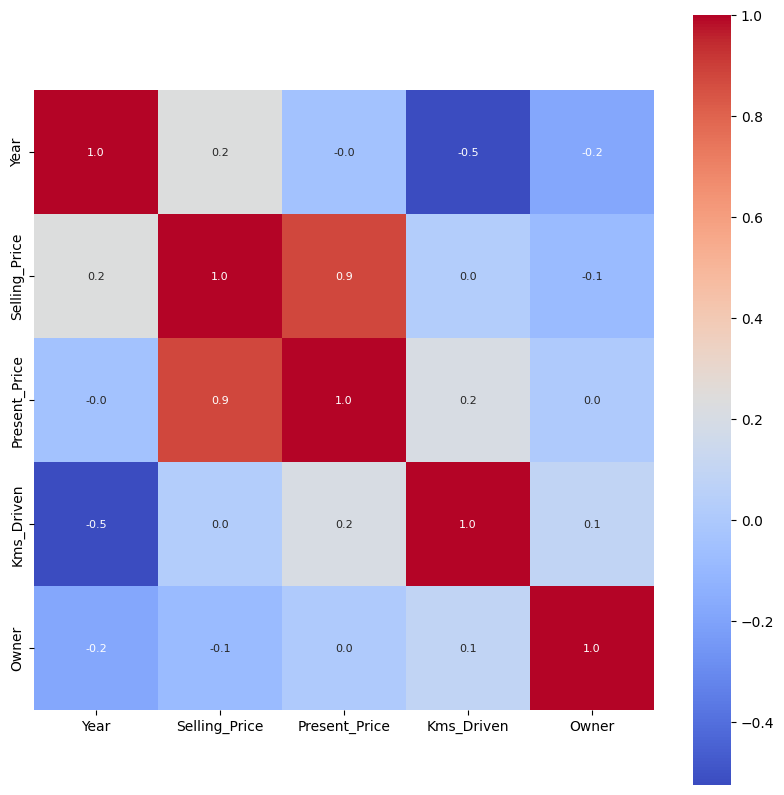

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

Splitting the data and Target

In [17]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


Model Training

1. Linear Regression using XGB Regressor





In [22]:
# loading the linear regression model
model = XGBRegressor()

In [23]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [24]:
# prediction on Training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 9.08115     1.3523742   2.856449    0.49545202  1.5039576   2.5064616
  1.1469284   0.6125348   0.7355186   0.48927075  3.7821617   4.8549247
  0.5494014   2.7473934   4.5871377   0.483119    1.3503251   7.4023137
  4.4889894   5.378839    3.49101     2.8919823   5.23718     1.1416041
  0.50979     2.8521314   1.9492795   4.5052395   1.1046435   4.4943347
  6.2658353   5.1052136   1.1870115  32.99679     2.2516687   5.6432414
  2.2493327   3.2521338   2.4987128  11.501406    0.651606    2.998215
  0.30049765  1.4577589  12.897959    2.9436257   0.19648622  4.497294
 14.252489    0.40133467  0.40161458  1.2413857   6.75158     0.50031257
  7.5046873  22.99866     1.6885835   0.31232527  1.0587488   9.24927
  5.2536      7.2559342  14.505668    9.250585    3.5111525   1.118358
  5.2317243   0.2981976   1.1111883  10.123128    0.5934855   8.985066
  0.31320617  0.59456396  3.8042712  10.248188    7.4480114   0.34702086
  3.3377137   7.5005665   0.3997963   2.007092    4.0021267   0.1995

In [25]:
# R squared Error and Mean absolute error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R square error: ",score_1)
print("Mean absolute error: ",score_2)


R square error:  0.9999967751986191
Mean absolute error:  0.006528453029692166


Visualize the actual prices and Predicted prices

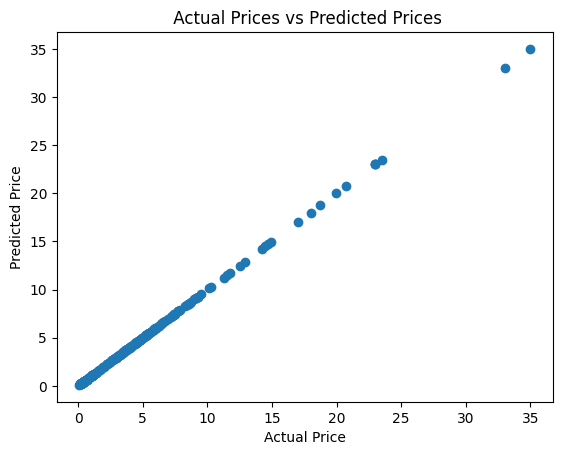

In [26]:
#BiVariate Analysis
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Training data
test_data_prediction = model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
score_2= metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
print("Mean absolute error: ",score_2)

R squared Error :  0.9623329841151624
Mean absolute error:  0.4910367737148629


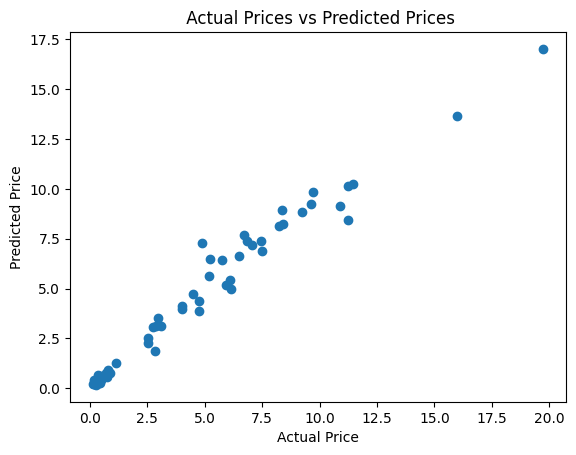

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()